In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("C:/Users/18574/Downloads/Nashville_housing_data_2013_2016.csv")

In [4]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

In [6]:
df.drop(columns = ['Unnamed: 0.1','Unnamed: 0','Property Address','Parcel ID','Suite/ Condo   #','Legal Reference','image','Owner Name','State',
                  'Address','City','Sale Date','Property City','Neighborhood'],inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           56636 non-null  object 
 1   Sale Price                         56636 non-null  int64  
 2   Sold As Vacant                     56636 non-null  object 
 3   Multiple Parcels Involved in Sale  56636 non-null  object 
 4   Acreage                            26017 non-null  float64
 5   Tax District                       26017 non-null  object 
 6   Land Value                         26017 non-null  float64
 7   Building Value                     26017 non-null  float64
 8   Total Value                        26017 non-null  float64
 9   Finished Area                      24166 non-null  float64
 10  Foundation Type                    24164 non-null  object 
 11  Year Built                         24165 non-null  flo

In [8]:
df.isna().sum()

Land Use                                 0
Sale Price                               0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Acreage                              30619
Tax District                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade                                32471
Bedrooms                             32477
Full Bath                            32359
Half Bath                            32490
dtype: int64

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.skew()

Sale Price        30.497747
Acreage           52.279277
Land Value         5.042097
Building Value    14.219915
Total Value        8.964840
Finished Area     65.945117
Year Built         0.275034
Bedrooms           0.877993
Full Bath          1.348189
Half Bath          1.451889
dtype: float64

<Axes: ylabel='Land Use'>

) missing from current font.\site-packages\IPython\core\events.py:93: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


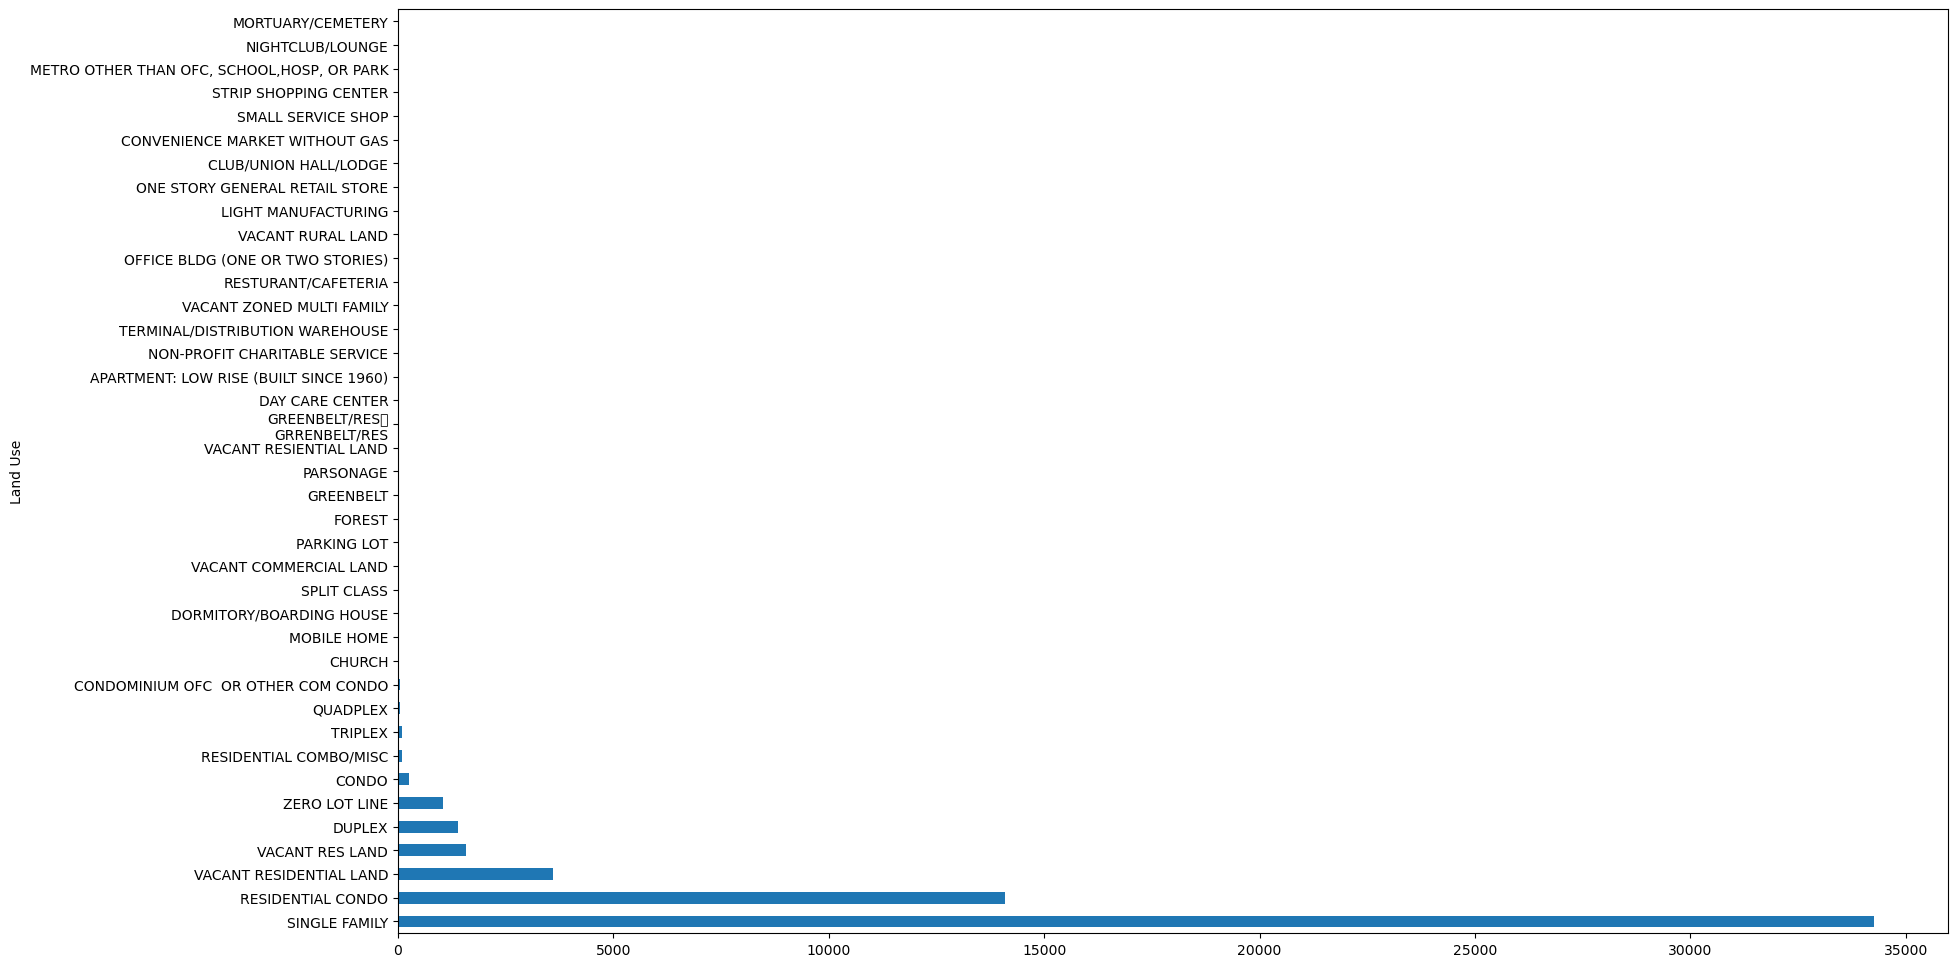

In [10]:
plt.figure(figsize=(20, 12))
df['Land Use'].value_counts().plot(kind = 'barh')

In [11]:
df['Sold As Vacant'] = df['Sold As Vacant'].map({'Yes': 1, 'No': 0})
df['Multiple Parcels Involved in Sale'] = df['Multiple Parcels Involved in Sale'].map({'Yes': 1, 'No': 0})

In [12]:
df['Land Value'] = df['Land Value'].fillna(df['Land Value'].median())
df['Building Value'] = df['Building Value'].fillna(df['Building Value'].median())
df['Total Value'] = df['Total Value'].fillna(df['Total Value'].median())
df['Finished Area'] = df['Finished Area'].fillna(df['Finished Area'].median())
df['Year Built'] = df['Year Built'].fillna(df['Year Built'].median())
df['Bedrooms'] = df['Bedrooms'].fillna(math.floor(df['Bedrooms'].mean()))
df['Full Bath'] = df['Full Bath'].fillna(math.ceil(df['Full Bath'].mean()))
df['Half Bath'] = df['Half Bath'].fillna(math.floor(df['Half Bath'].mean()))
df['Foundation Type'] = df['Foundation Type'].fillna((df['Foundation Type']).mode()[0])
df['Exterior Wall'] = df['Exterior Wall'].fillna((df['Exterior Wall']).mode()[0])
df['Grade'] = df['Grade'].fillna((df['Grade']).mode()[0])
df['Acreage'] = df['Acreage'].fillna((df['Acreage']).mode()[0])
df['Tax District'] = df['Tax District'].fillna('URBAN SERVICES DISTRICT')

In [13]:
df.isna().sum()

Land Use                             0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           56636 non-null  object 
 1   Sale Price                         56636 non-null  int64  
 2   Sold As Vacant                     56636 non-null  int64  
 3   Multiple Parcels Involved in Sale  56636 non-null  int64  
 4   Acreage                            56636 non-null  float64
 5   Tax District                       56636 non-null  object 
 6   Land Value                         56636 non-null  float64
 7   Building Value                     56636 non-null  float64
 8   Total Value                        56636 non-null  float64
 9   Finished Area                      56636 non-null  float64
 10  Foundation Type                    56636 non-null  object 
 11  Year Built                         56636 non-null  flo

In [15]:
le = LabelEncoder()
df['Exterior Wall'] = le.fit_transform(df[['Exterior Wall']])
df['Land Use'] = le.fit_transform(df[['Land Use']])
df['Tax District'] = le.fit_transform(df[['Tax District']])
df['Foundation Type'] = le.fit_transform(df[['Foundation Type']])
df['Grade'] = le.fit_transform(df[['Grade']])

C:\Users\18574\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18574\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18574\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18574\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           56636 non-null  int32  
 1   Sale Price                         56636 non-null  int64  
 2   Sold As Vacant                     56636 non-null  int64  
 3   Multiple Parcels Involved in Sale  56636 non-null  int64  
 4   Acreage                            56636 non-null  float64
 5   Tax District                       56636 non-null  int32  
 6   Land Value                         56636 non-null  float64
 7   Building Value                     56636 non-null  float64
 8   Total Value                        56636 non-null  float64
 9   Finished Area                      56636 non-null  float64
 10  Foundation Type                    56636 non-null  int32  
 11  Year Built                         56636 non-null  flo

In [17]:
corr = df.corr()
corr['Sale Price']

Land Use                            -0.043194
Sale Price                           1.000000
Sold As Vacant                      -0.009630
Multiple Parcels Involved in Sale    0.239940
Acreage                              0.047338
Tax District                        -0.052215
Land Value                           0.146538
Building Value                       0.146742
Total Value                          0.166812
Finished Area                        0.132104
Foundation Type                      0.005823
Year Built                           0.003041
Exterior Wall                       -0.026642
Grade                                0.077425
Bedrooms                             0.075154
Full Bath                            0.117403
Half Bath                            0.029458
Name: Sale Price, dtype: float64

<Axes: >

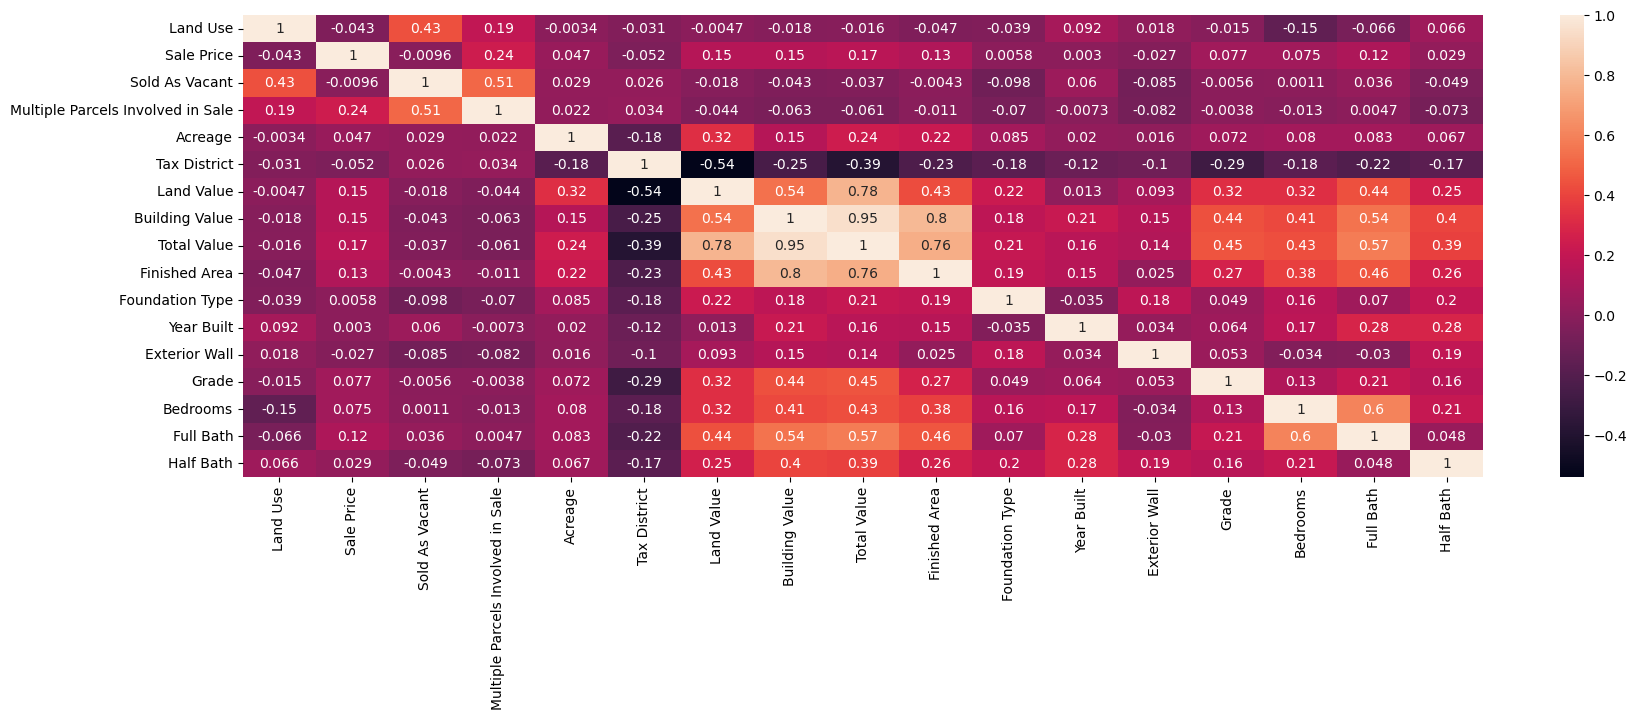

In [18]:
plt.figure(figsize=(20, 6))
sns.heatmap(corr,annot=True)

In [45]:
# Logistic Regression

pricing_threshold = 1.10  # Properties with Sale Price 10% or more above Total Value are overpriced

# Create the 'Price Status' variable
df['Price Status'] = (df['Sale Price'] > (pricing_threshold * df['Total Value'])).astype(int)

In [46]:
df['Price Status'].value_counts()

Price Status
1    37710
0    18926
Name: count, dtype: int64

In [56]:
# Define your features and target variable
from sklearn.preprocessing import StandardScaler
X = df.drop(['Price Status', 'Sale Price'], axis=1) # Features
y = df['Price Status']  # Target variable

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create and fit the logistic regression model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{report}')

Accuracy: 0.6348870056497176
Confusion Matrix:
[[1085 2675]
 [1461 6107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.29      0.34      3760
           1       0.70      0.81      0.75      7568

    accuracy                           0.63     11328
   macro avg       0.56      0.55      0.55     11328
weighted avg       0.61      0.63      0.61     11328



C:\Users\18574\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Index(['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',
       'Acreage', 'Tax District', 'Land Value', 'Building Value',
       'Total Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath'],
      dtype='object')
                              Feature  Coefficient
7                         Total Value     0.904145
2   Multiple Parcels Involved in Sale     0.343368
4                        Tax District     0.174714
8                       Finished Area     0.073304
14                          Full Bath     0.068756
12                              Grade     0.062635
0                            Land Use     0.039929
13                           Bedrooms     0.011417
15                          Half Bath    -0.007544
3                             Acreage    -0.031930
10                         Year Built    -0.036275
9                     Foundation Type    -0.056672
11                      Exterio

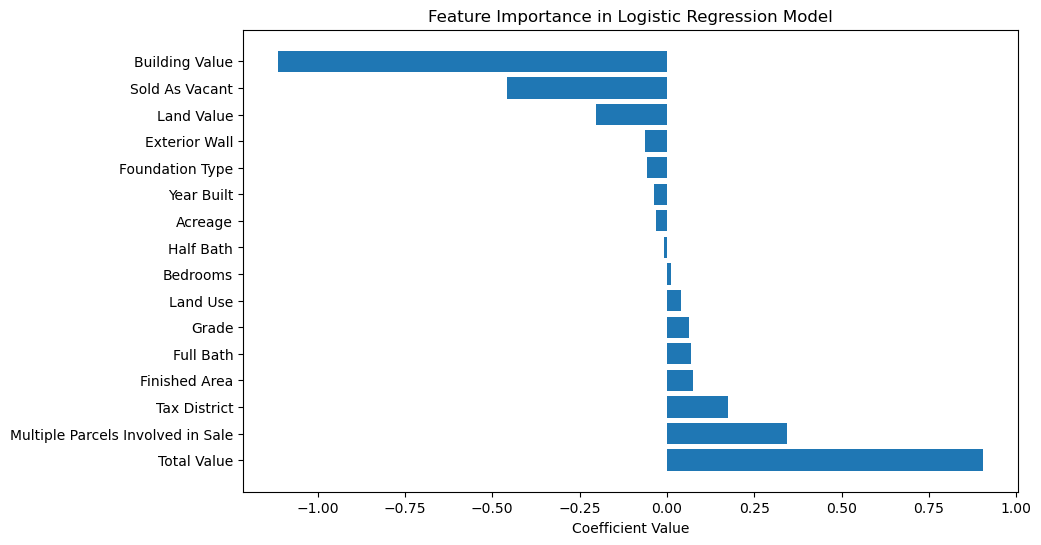

In [57]:
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_names)
print(feature_importance)
# Visualize feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

In [50]:
# Decision tree

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)

# Evaluate the decision tree model
accuracy_tree = accuracy_score(y_test, tree_predictions)
confusion_tree = confusion_matrix(y_test, tree_predictions)
report_tree = classification_report(y_test, tree_predictions)

print("Decision Tree Model Results:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:\n", confusion_tree)
print("Classification Report:\n", report_tree)

Decision Tree Model Results:
Accuracy: 0.660840395480226
Confusion Matrix:
 [[1171 2589]
 [1253 6315]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.31      0.38      3760
           1       0.71      0.83      0.77      7568

    accuracy                           0.66     11328
   macro avg       0.60      0.57      0.57     11328
weighted avg       0.63      0.66      0.64     11328



In [51]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
forest_model.fit(X_train, y_train)

forest_predictions = forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_forest = accuracy_score(y_test, forest_predictions)
confusion_forest = confusion_matrix(y_test, forest_predictions)
report_forest = classification_report(y_test, forest_predictions)

print("Random Forest Model Results:")
print(f"Accuracy: {accuracy_forest}")
print("Confusion Matrix:\n", confusion_forest)
print("Classification Report:\n", report_forest)

Random Forest Model Results:
Accuracy: 0.6887358757062146
Confusion Matrix:
 [[ 950 2810]
 [ 716 6852]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.25      0.35      3760
           1       0.71      0.91      0.80      7568

    accuracy                           0.69     11328
   macro avg       0.64      0.58      0.57     11328
weighted avg       0.66      0.69      0.65     11328



In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, gb_predictions)
confusion_gb = confusion_matrix(y_test, gb_predictions)
report_gb = classification_report(y_test, gb_predictions)

print("Gradient Boosting Model Results:")
print(f"Accuracy: {accuracy_gb}")
print("Confusion Matrix:\n", confusion_gb)
print("Classification Report:\n", report_gb)

Gradient Boosting Model Results:
Accuracy: 0.6945621468926554
Confusion Matrix:
 [[ 536 3224]
 [ 236 7332]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.14      0.24      3760
           1       0.69      0.97      0.81      7568

    accuracy                           0.69     11328
   macro avg       0.69      0.56      0.52     11328
weighted avg       0.69      0.69      0.62     11328



In [53]:
# Gradient boost
import tensorflow as tf
from tensorflow import keras

# Create a Neural Network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

nn_predictions = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, nn_predictions)
confusion_nn = confusion_matrix(y_test, nn_predictions)
report_nn = classification_report(y_test, nn_predictions)

print("Neural Network Model Results:")
print(f"Accuracy: {accuracy_nn}")
print("Confusion Matrix:\n", confusion_nn)
print("Classification Report:\n", report_nn)

Epoch 1/10
708/708 [==============================] - 4s 4ms/step - loss: 251.7522 - accuracy: 0.5656 - val_loss: 94.1731 - val_accuracy: 0.3832
Epoch 2/10
708/708 [==============================] - 3s 4ms/step - loss: 149.0800 - accuracy: 0.5669 - val_loss: 76.3814 - val_accuracy: 0.3737
Epoch 3/10
708/708 [==============================] - 3s 4ms/step - loss: 137.8727 - accuracy: 0.5627 - val_loss: 159.4906 - val_accuracy: 0.3614
Epoch 4/10
708/708 [==============================] - 3s 4ms/step - loss: 104.7138 - accuracy: 0.5627 - val_loss: 244.3279 - val_accuracy: 0.6682
Epoch 5/10
708/708 [==============================] - 3s 4ms/step - loss: 116.9339 - accuracy: 0.5598 - val_loss: 35.0474 - val_accuracy: 0.6678
Epoch 6/10
708/708 [==============================] - 3s 5ms/step - loss: 84.0906 - accuracy: 0.5678 - val_loss: 101.0287 - val_accuracy: 0.3640
Epoch 7/10
708/708 [==============================] - 3s 4ms/step - loss: 87.1653 - accuracy: 0.5666 - val_loss: 61.1554 - val_a